## Code submission

If you would like to use Jupyter (perhaps the easiest way), just submit the notebook file to bCourses. Name it lastname_firstname_(Homework#).ipynb. For example, obama_barack_1.ipynb. This applies to the case if you **only** have a notebook file.

If you use MATLAB or Julia/Python (not the notebook), **or** if you have multiple files, name your programs as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). Then **zip everything** into a single file lastname_firstname_(Homework#).zip, and submit the zip file to bCourses. For example, obama_barack_1.zip.

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear and understandable.

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

## Problem 1

Consider $u'(t)=f(u(t)),u(0)=u_0$, and $f:\mathbb{R}^{d}\to \mathbb{R}$ 
is Lipschitz continuous with a
Lipschitz constant $L$. Let $\max \Vert u''(t)\Vert$ be bounded by a constant $M$ for $0\le t\le T$. Prove that the backward Euler method converges as the step size $h\to 0$.

**Proof**
Assuming that $f$ and $u$ are analytic:
We have the Backward Euler's Formula:
\begin{equation}
u_{n+1} = u_n + hf(u_{n+1}, t_{n+1}) \tag{1-Exact}
\end{equation}
As well as the numerical method, using Taylor expansion around point $t = t_{n+1}$, we have:
\begin{equation}
u_h(t_n) = u_h(t_{n+1}) + u'_h(t_{n+1})(t_n - t_{n+1}) + \frac{h^2}{2}u''_h(\xi) 
\end{equation}

Rearranging, we have:
\begin{equation}
u_h(t_{n+1}) = u_h(t_n) + hf(u_h(t_{n+1}), t_{n+1}) - \frac{h^2}{2}u''_h(\xi) \tag{2-numerical}
\end{equation}


Then we perform $(1)-(2)$ to get an error:
\begin{equation}
e_{n+1} = e_n + h( f(u_{n+1}, t_{n+1}) - f(u_h(t_{n+1}), t_{n+1}) ) + \frac{h^2}{2}u''_h(\xi)
\end{equation}
Since $u$ is Lipschitz continuous, we must have 
\begin{equation}
| f(u(t)) - f(u_h(t)) | \le L|u(t) - u_h(t) | 
\end{equation} for all $t$.

Also, $\max \Vert u''(t)\Vert$ $\le$ $M$ is bounded.
By triangle inequality on 2-norm, we can simplify our equation into:
\begin{equation}
\Vert e_{n+1} \Vert \le \Vert e_n \Vert + h\Vert ( f(u_{n+1}, t_{n+1}) - f(u_h(t_{n+1}), t_{n+1}) ) \Vert
+ \frac{h^2}{2} \Vert u''_h(\xi) \Vert
\end{equation}
\begin{equation}
\Vert e_{n+1} \Vert \le \Vert e_n \Vert + hL\Vert e_{n+1} \Vert
+ \frac{h^2}{2} \Vert u''_h(\xi) \Vert
\end{equation}
\begin{equation}
(1-hL)\Vert e_{n+1} \Vert 
\le 
\Vert e_n \Vert
+ \frac{Mh^2}{2}
\end{equation}
\begin{equation}
\Vert e_{n+1} \Vert \le \frac{1}{1-hL}\Vert e_n \Vert + \frac{Mh^2}{2(1-hL)}
\end{equation}
Similarly
\begin{equation}
\Vert e_{n} \Vert \le \frac{1}{1-hL}\Vert e_{n-1} \Vert + \frac{Mh^2}{2(1-hL)}
\end{equation}

Continue, we find:
\begin{equation}
\Vert e_{n+1} \Vert \le \frac{1}{1-hL} \Vert e_n \Vert + \frac{Mh^2}{2} \frac{1}{1-hL}
\le
\frac{1}{1-hL}(\frac{1}{1-hL} \Vert e_{n-1} \Vert + \frac{Mh^2}{2} \frac{1}{1-hL}) 
+ 
\frac{Mh^2}{2} \frac{1}{1-hL}
\end{equation}
$\le \dots$
\begin{equation}
\le (\frac{1}{1-hL})^{n+1} \Vert e_0 \Vert + \frac{Mh^2}{2} (\frac{1}{1-hL} + (\frac{1}{1-hL})^2
+ \dots + (\frac{1}{1-hL})^{n+1} )
\end{equation}
According to the sum of geometric series, in general:
\begin{equation}
\sum_{i=1}^{n+1} r^{i-1} = 1 + r + r^2 + \dots + r^{n-1} + r^n = \frac{1 - r^{n+1}}{1-r}
\end{equation}

We can further simplify:
\begin{equation}
\Vert e_{n+1} \Vert \le
(\frac{1}{1-hL}^{n+1}) \Vert e_0 \Vert + \frac{Mh^2}{2} (\frac{1}{1-hL})(\frac{1-(\frac{1}{1-hL})^{n+1}}{1-\frac{1}{1-hL}})
\end{equation}
\begin{equation}
\Vert e_{n+1}\Vert \le (\frac{1}{1-hL})^{n+1} \Vert e_0 \Vert +
\frac{Mh(1-(1-hL)^{n+1})}{2L(1-hL)^{n+1}}
\end{equation}

However, assuming our initial condition is exact (because it is given), we have $\Vert e_0\Vert = 0$, thus (the numerator is bounded by 1):
\begin{equation}
\Vert e_{n+1} \Vert \le \frac{M}{2L} \cdot h \cdot (1-(1-hL)^{n+1}) \cdot (1-hL)^{-n-1} 
\end{equation}

\begin{equation}
= \frac{M}{2L} \cdot h \cdot ((1-hL)^{-n-1} - 1) 
= \frac{Mh}{2L} \cdot ( (\frac{1}{1-hL})^{n+1} - 1  )
\end{equation}

To further simplify, use an algebraic manipulation $(\frac{1-hL+hL}{1-hL})^{n+1} = (1 + \frac{hL}{1-hL})^{n+1} \le e^{(n+1)(\frac{hL}{1-hL})}$ because as $h \rightarrow 0$, $\frac{hL}{1-hL}$ is small and goes to 0. Thus follows from the property $1+x \le e^x$

Therefore, we have:
\begin{equation}
\Vert e_{n+1} \Vert \le
\frac{Mh}{2L} (e^{(n+1)(\frac{hL}{1-hL})}-1) \le
\frac{Mh}{2L} e^{(n+1)(\frac{hL}{1-hL})}
\end{equation}

We have as number of steps $n+1$, $n+1 \le N$. Therefore:
\begin{equation}
\Vert e_{n+1} \Vert \le
\frac{Mh}{2L} e^{\frac{NhL}{1-hL}}
\end{equation}
As $h\rightarrow 0$, we have $\frac{Mh}{2L}e^{(\frac{TL}{1-hL})}\rightarrow 0$ because $Nh = T$. 

Therefore backward Euler method is convergent as error diminishes.

## Problem 2

Consider the initial value problem
$$
\begin{split}
u'_{1} &= u_{1},\\
u'_{2} &= u_{1} - u_{2},\\
\end{split}
$$
with initial condition $(u_{1}(0),u_{2}(0))=(1,1)$. 

1. Find a way to solve the problem above analytically, and write down the answer of u(T=2.0).

2. Solve the problem numerically using the trapezoidal rule. Verify that the solution agrees with the exact solution at time $T=2.0$. Use a number of step sizes $h=2^{-i},i=5,\ldots,10.$ Plot the error $e=\Vert u(1)-u^*(1)\Vert_2$ v.s. step size $h$ in a loglog plot, and estimate the convergence rate for each scheme.

**Note**: the routine for computing the error, plotting and computing the slope is provided. 

**1. Solve initial value problem analytically:**
<br/>
Let:
\begin{equation}
\mathbf{u} =
\begin{pmatrix}
u_1\\
u_2
\end{pmatrix}
\end{equation}
<br/> We can therefore rewrite the system compactly as:
$\mathbf{\dot{u}} = A\mathbf{u}$ where $A = \begin{pmatrix} 1 & 0\\ 1 & -1\end{pmatrix}$, with the initial condition:
$
\begin{pmatrix}
u_1(0)\\
u_2(0)
\end{pmatrix}
= 
\begin{pmatrix}
1\\
1
\end{pmatrix}
$<br/>
Then we can obtain the analytical solution:
\begin{equation}
\mathbf{u} = e^{At} \mathbf{u}(0)
\end{equation} 
Using Taylor series expansion, we obtain:
\begin{equation}
e^{At} = I + At + \frac{1}{2} A^2 t^2 + \frac{1}{3!} A^3 t^3 + \dots = \sum_{j=0}^{\infty} \frac{1}{j!}A^jt^j
\end{equation}
Plugging in $A=\begin{pmatrix} 1&0\\ 1&-1 \end{pmatrix}$, notice that:
\begin{equation}
I = \begin{pmatrix} 1 & 0\\ 0 & 1\end{pmatrix}, A = \begin{pmatrix} 1 & 0\\ 1 & -1\end{pmatrix},
A^2 = AA = \begin{pmatrix} 1 & 0\\ 0 & 1\end{pmatrix} = I
\end{equation}
Therefore we can simplify our Taylor Expansion, noting that $A^{2n} = I$ and $A^{2n+1} = A$. We have:
\begin{equation}
e^{At} = I + At + \frac{1}{2} A^2 t^2 + \frac{1}{3!} A^3 t^3 + \dots = 
I(1 + \frac{1}{2!}t^2 + \frac{1}{4!}t^4 + ...) + A(t + \frac{1}{3!}t^3 + \frac{1}{5!}t^5 + ...)
\end{equation}
\begin{equation}
e^{At} = I(\sum_{n=0}^{\infty}\frac{t^{2n}}{(2n)!}) + A(\sum_{n=0}^{\infty}\frac{t^{2n+1}}{(2n+1)!}) = 
I\cosh{t} + A\sinh{t}
\end{equation}

Here the solution is obtained:
\begin{equation}
\mathbf{u} =
    \begin{pmatrix}
        u_1\\
        u_2
    \end{pmatrix} = 
(I(\cosh{t}) + A(\sinh{t})) \begin{pmatrix} 1 \\ 1 \end{pmatrix} =
    \begin{pmatrix}
        \sinh{t} + \cosh{t} \\
        \cosh{t}
    \end{pmatrix}
\end{equation}

We have:
\begin{equation}
u_{exact} =
    \begin{pmatrix}
        \sinh{2.0} + \cosh{2.0} \\
        \cosh{2.0}
    \end{pmatrix}
\approx
    \begin{pmatrix}
        7.3891 \\
        3.7622
    \end{pmatrix}
\end{equation}
 

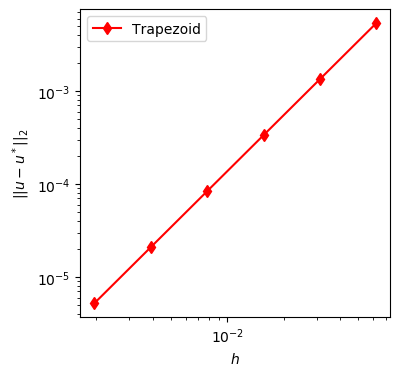

Slope for Trapezoid = 2.0002635440177077


In [51]:
using LinearAlgebra
using PyPlot

function Trapezoid(N,T,u0)
    # Fill code here
    h = T/N; # step size h
    t = (0:h:T) # our mesh grid
    U = zeros(2, length(t)) # 0 matrix, used to store our results
    U[:,1] = u0
    # u' = Au
    # Trapezoidal rule:
    # un+1 = un + h/2(Aun + Aun+1) => un+1 = [I - (h/2)A]^(-1) * [I + (h/2)*A] un
    A = reshape([1, 1, 0, -1], 2, 2); 
    id = Matrix(I, 2, 2);
    for i in 1:length(t)-1
        U[:,i+1] = inv(id - (h/2)*A ) *  ( id + (h/2)*A ) * U[:,i] 
    end
    u = U[:, end]
    return u
end

u0 = [1.0,1.0]
T = 2.0
# You need to compute uexact at T=2.0

uexact = [sinh(2.0)+cosh(2.0), cosh(2.0)];

# Plotting routine provided below
NList = 2 .^(5:10)
errTrapeList = zeros(size(NList))
for i = 1 : length(NList)
    N = NList[i];
    utrape = Trapezoid(N,T,u0);
    errTrapeList[i] = norm(utrape-uexact);
end

figure(1,figsize=(4,4));
loglog(T./NList, errTrapeList, "r-d", label="Trapezoid");
xlabel(L"h");
ylabel(L"||u-u^*||_2");
legend();

slopeTrape = -(log(errTrapeList[end])-log(errTrapeList[1])) / 
(log(NList[end]) - log(NList[1]));

println("Slope for Trapezoid = ", slopeTrape )

## Problem 3

Consider a simple pendulum of length $l$, forming an angle $\theta(t)$ with the
vertical axis. The equation of motion for the pendulum is given by

$$\theta''(t)+\frac{g}{l} \sin(\theta(t))=0,$$

where $g$ is the gravitational constant, with given initial conditions

$$\theta(0)=\theta_0,\quad \theta'(0)=\omega_0.$$

1. Rewrite the equation as a system of first order equations in $u(t)=(\theta(t),\omega(t))$. Fill the `func` function below. 

2. Write a forward Euler method. Use a sufficiently small time step, and plot the solution of $\theta(t)$ with $g=l=1$ and initial condition $(\theta(0),\omega(0))=(2.5,0.0)$ till $T=25$. Since no exact solution is available, measure the convergence rate by means of the solution at T=25 obtained from three time steps h, h/2, and h/4.

**Rewrite Equation as a System of First Order Equations**
To transform into a system of first order equations, we let:
\begin{equation}
\theta(t) = \theta(t)
\end{equation}

\begin{equation}
\omega(t) = \theta'(t)
\end{equation}

Then we have:
\begin{equation}
\theta'(t) = \omega(t)
\end{equation}

\begin{equation}
\omega'(t) = -\frac{g}{l}\sin({\theta(t)})
\end{equation}

We therefore have a system:
\begin{equation}
\mathbf{u}'(t) = \begin{pmatrix} \omega(t) \\ -\frac{g}{l}\sin(\theta(t))
\end{pmatrix}
\end{equation}

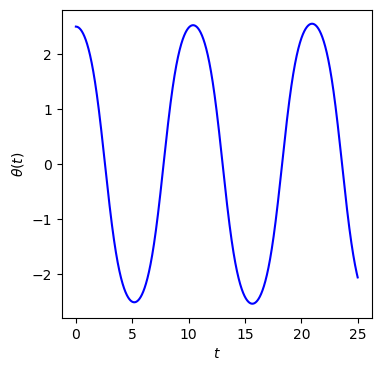

PyObject Text(26.0, 0.5, '$\\theta(t)$')

In [52]:
function func(u,g,l)
    # fill here for evaluating f(u)
    # assuming u = [\theta(t), \omega(t)] is 2 x 1 matrix
    theta = u[1];
    omega = u[2];
    f_u = [omega ,(-g/l) * sin(theta)];
    return f_u
    
end

function ForwardEulerFull(N,T,u0,g,l)
    # Fill code here. 
    # The output should be the full history of the solution
    # i.e. the output u should be of size 2×(N+1)
    # This is of course memory intensive and is not the 
    # commonly used approach
    u = zeros(2,N+1)
    h = T/N # calculate step size
    u[:,1] = u0 # put in our first u0
    for i in 1:N
        u[:,i+1] = u[:,i] + h * func(u[:,i], g, l)
    end
    return u
end

# This should plot out the solution
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

uEulerFull = ForwardEulerFull(N,T,u0,g,l)
tList = collect(0:N)*(T/N)

using PyPlot
figure(1,figsize=(4,4))
plot(tList,vec(uEulerFull[1,:]),"b-")
xlabel(L"t")
ylabel(L"\theta(t)")

In [53]:
function ForwardEuler(N,T,u0,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    
    # code is the same ...
    U = zeros(2, N+1) # store our results
    h = T/N # calculate step size
    U[:,1] = u0 # put in our first u0
    for i in 1:N
        U[:,i+1] = U[:,i] + h * func(U[:,i], g, l)
    end
    u = U[:, end];
    return u
end
# Estimate the order of convergence
# Since T is constant = 25.0, we can control the step size h by resetting N
# using a large enough N=10000, we then double and quadruple the number of steps to achieve h, h/2, h/4
u_h = ForwardEuler(10000, 25.0, [2.5, 0.0], 1, 1)
u_half_h = ForwardEuler(20000, 25.0, [2.5, 0.0], 1, 1)
u_halfhalf_h = ForwardEuler(40000, 25.0, [2.5, 0.0], 1, 1)

# use 2-norm to derive our convergence order
order = log2( norm(u_h - u_half_h) / norm(u_half_h - u_halfhalf_h) )
print("Calculated order numerically: ", order, ", Forward Euler should be ", round(order), " order convergent")
# as expected, Forward Euler is first order convergent

Calculated order numerically: 1.2250638850248023, Forward Euler should be 1.0 order convergent

## Problem 4

1. Repeat Problem 3.2 using the trapezoidal rule. Modify your implementation in Problem 2 if needed.

2. Repeat Problem 3.2 using the Adams-Bashforth 3 (AB3) scheme. Obtain the first two steps using forward Euler and trapezoidal rule, respectively. Observe the difference in terms of the convergence rate.



In [54]:
# Trapezoidal Rule
function Trapezoid(N,T,u0,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    function F(u, g, l)
        theta = u[1]
        omega = u[2]
        return [omega, -(g/l)*sin(theta)]
    end
    h = T/N
    t = (0:h:T)
    U = zeros(2, length(t))
    U[:, 1] = u0
    for i in 1:length(t)-1
        u_next = U[:, i]
        rep = 1
        # Fixed Point Iteration
        while rep <= 100 # ensure convergence
            u_next = U[:, i] + (h/2) * F(u_next, g, l) + (h/2) * F(U[:, i], g, l)
            rep = rep + 1
        end
        U[:, i+1] = u_next
    end
    u = U[:, end] # assign last vector
    return u
end
# Estimate the order of convergence

# Since T is constant = 25.0, we can control the step size h by resetting N
# using a large enough N=10000, we then double and quadruple the number of steps to achieve h, h/2, h/4
u_h = Trapezoid(10000, 25.0, [2.5, 0.0], 1, 1)
u_half_h = Trapezoid(20000, 25.0, [2.5, 0.0], 1, 1)
u_halfhalf_h = Trapezoid(40000, 25.0, [2.5, 0.0], 1, 1)

# use 2-norm to derive our convergence order
order2 = log2( norm(u_h - u_half_h) / norm(u_half_h - u_halfhalf_h) )
print("Calculated order numerically: ", order2, ", Trapezoidal Rule should be ", round(order2), " order convergent")
# as expected, Trap is 2nd order convergent

Calculated order numerically: 2.000001922310115, Trapezoidal Rule should be 2.0 order convergent

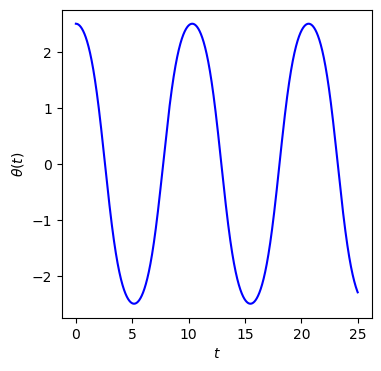

PyObject Text(26.0, 0.5, '$\\theta(t)$')

In [55]:
# Plot solution obtained with Trap
function TrapezoidFull(N,T,u0,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    function F(u, g, l)
        theta = u[1]
        omega = u[2]
        return [omega, -(g/l)*sin(theta)]
    end
    h = T/N
    t = (0:h:T)
    U = zeros(2, length(t))
    U[:, 1] = u0
    for i in 1:length(t)-1
        u_next = U[:, i]
        rep = 1
        # Fixed Point Iteration
        while rep <= 100 # ensure convergence
            u_next = U[:, i] + (h/2) * F(u_next, g, l) + (h/2) * F(U[:, i], g, l)
            rep = rep + 1
        end
        U[:, i+1] = u_next
    end
    u = U[:, end] # assign last vector
    return U
end
# ----------- Plotting
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

U = TrapezoidFull(N,T,u0,g,l)
tList = collect(0:N)*(T/N)

using PyPlot
figure(1,figsize=(4,4))
plot(tList,vec(U[1,:]),"b-")
xlabel(L"t")
ylabel(L"\theta(t)")

***For clarity, display Adam-Bashforth-3 Method:***
\begin{equation}
u_{n+1} = u_n + \frac{h}{12} (23f(t_n, u_n) - 16f(t_{n-1}, u_{n-1}) + 5f(t_{n-2}, u_{n-2}))
\end{equation}

In [56]:
# Need some method to compute u1,u2
# Use Forward Euler for u1, Trap for u2. Write as two functions that utilize the previous functions

# Wrong, code two versions of AB3 using respectively fe and trp to compute both u1 and u2 then compare orders.
function ForwardEuler_u1u2(N, T, u0, g, l)
    # Method to obtain first two vectors --FE
    
    U = zeros(2, 3) # store results
    h = T/N # step size
    U[:,1] = u0
    for i in 1:2
        U[:,i+1] = U[:,i] + h * func(U[:,i], g, l)
    end
    # This should only return 2 x 3 array, from which we take the last two as u1 and u2
    u1 = U[:, 2]
    u2 = U[:, 3]
    return u1, u2
end

function Trapezoid_u1u2(N, T, u0, g, l)
    function F(u, g, l)
        theta = u[1]
        omega = u[2]
        return [omega, -(g/l)*sin(theta)]
    end
    h = T/N
    t = (0:h:T) # mesh grid
    U = zeros(2, 3)
    U[:, 1] = u0
    for i in 1:2 # fast calculation
        u_next = U[:, i] 
        rep = 0
        while rep <= 1000
            u_next = U[:, i] + (h/2) * F(u_next, g, l) + (h/2) * F(U[:, i], g, l)
            rep = rep + 1
        end        
        U[:, i+1] = u_next
    end
    # U should be a 2 x 3 matrix
    u1 = U[:, 2]
    u2 = U[:, 3]
    return u1, u2
end

#------------------ SET UP, USE FOR LATER
u1_fe, u2_fe = ForwardEuler_u1u2(10000,25,[2.5,0.0],1.0,1.0) # N = 10000
u1_trap, u2_trap = Trapezoid_u1u2(10000,25,[2.5,0.0],1.0,1.0)

u1_fe_half, u2_fe_half = ForwardEuler_u1u2(20000,25,[2.5,0.0],1.0,1.0) # N = 20000
u1_trap_half, u2_trap_half = Trapezoid_u1u2(20000,25,[2.5,0.0],1.0,1.0)

u1_fe_fourth, u2_fe_fourth = ForwardEuler_u1u2(40000,25,[2.5,0.0],1.0,1.0) # N = 40000
u1_trap_fourth, u2_trap_fourth = Trapezoid_u1u2(40000,25,[2.5,0.0],1.0,1.0)
#------------------
# Version 1
function AB3_FE(N,T,u0,u1,u2,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    h = T/N
    t = (0:h:T) # mesh grid
    U = zeros(2, length(t)) # 0 matrix to store our results
    
    function F(u, g, l)
        theta = u[1]
        omega = u[2]
        return [omega, -(g/l)*sin(theta)]
    end
    
    U[:, 1] = u0
    U[:, 2] = u1
    U[:, 3] = u2
    for i in 3:length(t)-1
        U[:,i+1] = U[:,i] + (h/12) * (23 * F(U[:,i], g, l) - 16 * F(U[:,i-1], g, l) + 5 * F(U[:,i-2], g, l))
    end
    u = U[:, end]
    return u # change to be u
end

# Version 2
function AB3_Trap(N,T,u0,u1,u2,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    h = T/N
    t = (0:h:T) # mesh grid
    U = zeros(2, length(t)) # 0 matrix to store our results
    
    function F(u, g, l)
        theta = u[1]
        omega = u[2]
        return [omega, -(g/l)*sin(theta)]
    end
    
    U[:, 1] = u0
    U[:, 2] = u1
    U[:, 3] = u2
    for i in 3:length(t)-1
        U[:,i+1] = U[:,i] + (h/12) * (23 * F(U[:,i], g, l) - 16 * F(U[:,i-1], g, l) + 5 * F(U[:,i-2], g, l))
    end
    u = U[:, end]
    return u
end

# Estimate the order of convergence
# (1) For AB3_FE
u_h_fe = AB3_FE(10000, 25.0, [2.5, 0.0], u1_fe, u2_fe, 1, 1)
u_half_h_fe = AB3_FE(20000, 25.0, [2.5, 0.0], u1_fe_half, u2_fe_half, 1, 1)
u_halfhalf_h_fe = AB3_FE(40000, 25.0, [2.5, 0.0], u1_fe_fourth, u2_fe_fourth, 1, 1)
# use 2-norm to derive our convergence order
order3_fe = log2( norm(u_h_fe - u_half_h_fe) / norm(u_half_h_fe - u_halfhalf_h_fe) )
print("Calculated order numerically: ", order3_fe, ", AB3 Rule with Euler is ", round(order3_fe), " order convergent\n")

# (2) For AB3_Trap
u_h_trap = AB3_Trap(10000, 25.0, [2.5, 0.0], u1_trap, u2_trap, 1, 1)
u_half_h_trap = AB3_Trap(20000, 25.0, [2.5, 0.0], u1_trap_half, u2_trap_half, 1, 1)
u_halfhalf_h_trap = AB3_Trap(40000, 25.0, [2.5, 0.0], u1_trap_fourth, u2_trap_fourth, 1, 1)
# use 2-norm to derive our convergence order
order3_trap = log2( norm(u_h_trap - u_half_h_trap) / norm(u_half_h_trap - u_halfhalf_h_trap) )
print("Calculated order numerically: ", order3_trap, ", AB3 Rule with Trapezoidal is ", round(order3_trap), " order convergent")

Calculated order numerically: 1.9684150458385055, AB3 Rule with Euler is 2.0 order convergent
Calculated order numerically: 3.000050883876511, AB3 Rule with Trapezoidal is 3.0 order convergent

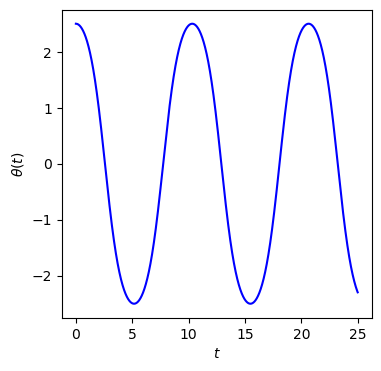

PyObject Text(26.0, 0.5, '$\\theta(t)$')

In [57]:
# Plot the solutions for AB3_FE and AB3_Trap
# Version 1
function AB3_FEFull(N,T,u0,u1,u2,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    h = T/N
    t = (0:h:T) # mesh grid
    U = zeros(2, length(t)) # 0 matrix to store our results
    
    function F(u, g, l)
        theta = u[1]
        omega = u[2]
        return [omega, -(g/l)*sin(theta)]
    end
    
    U[:, 1] = u0
    U[:, 2] = u1
    U[:, 3] = u2
    for i in 3:length(t)-1
        U[:,i+1] = U[:,i] + (h/12) * (23 * F(U[:,i], g, l) - 16 * F(U[:,i-1], g, l) + 5 * F(U[:,i-2], g, l))
    end
    return U
end

# Version 2
function AB3_TrapFull(N,T,u0,u1,u2,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    h = T/N
    t = (0:h:T) # mesh grid
    U = zeros(2, length(t)) # 0 matrix to store our results
    
    function F(u, g, l)
        theta = u[1]
        omega = u[2]
        return [omega, -(g/l)*sin(theta)]
    end
    
    U[:, 1] = u0
    U[:, 2] = u1
    U[:, 3] = u2
    for i in 3:length(t)-1
        U[:,i+1] = U[:,i] + (h/12) * (23 * F(U[:,i], g, l) - 16 * F(U[:,i-1], g, l) + 5 * F(U[:,i-2], g, l))
    end
    return U
end
# --------------------
# AB3_FE plot
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

U_fe = AB3_FEFull(N,T,u0,u1_fe,u2_fe,g,l)
tList = collect(0:N)*(T/N)

using PyPlot
figure(1,figsize=(4,4))
plot(tList,vec(U_fe[1,:]),"b-")
xlabel(L"t")
ylabel(L"\theta(t)")

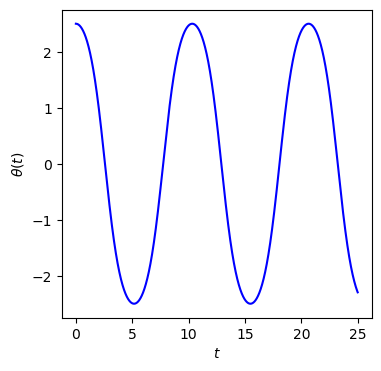

PyObject Text(26.0, 0.5, '$\\theta(t)$')

In [58]:
# AB3_Trap plot
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

U_Trap = AB3_TrapFull(N,T,u0,u1_trap,u2_trap,g,l)
tList = collect(0:N)*(T/N)

using PyPlot
figure(1,figsize=(4,4))
plot(tList,vec(U_Trap[1,:]),"b-")
xlabel(L"t")
ylabel(L"\theta(t)")